📘 Notebook 10 – HR Insights & Recommendations
🎯 Purpose

Provide HR with actionable insights from employee, candidate, and job datasets.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

DATA_PATH = Path(r"C:\Users\abanu\Documents\t_iq_hr\data\processed")
OUT_PATH = DATA_PATH

sns.set(style="whitegrid")


In [10]:
hrms_master = pd.read_csv(OUT_PATH / "HRMS_dashboard_master.csv")
candidate_master = pd.read_csv(OUT_PATH / "Candidates_dashboard_master.csv")
jobs_master = pd.read_csv(OUT_PATH / "Jobs_dashboard_master.csv")


C:\Users\abanu\AppData\Local\Temp\ipykernel_12588\2735608044.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department', y='high_risk_pct', data=dept_summary, palette='Reds_r')


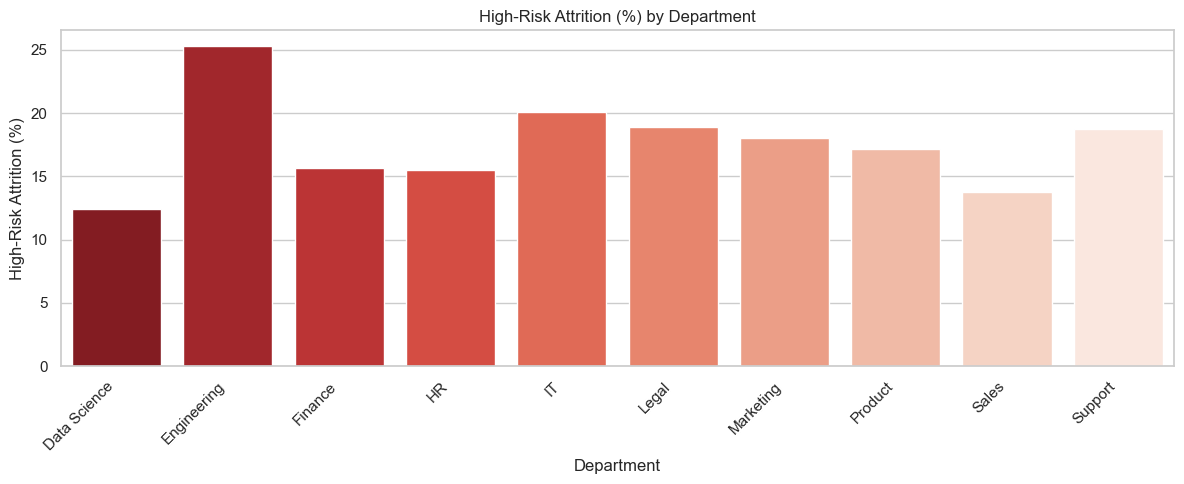

Top 10 employees at attrition risk:
      employee_id    department  attrition_probability  engagement_score  \
5470     EMP5471         Legal               0.987362              0.56   
8872     EMP8873     Marketing               0.983796              0.47   
6870     EMP6871  Data Science               0.980902              0.44   
8804     EMP8805       Finance               0.979961              0.43   
8513     EMP8514            IT               0.979518              0.33   
7380     EMP7381       Product               0.977131              0.76   
7664     EMP7665     Marketing               0.973664              0.33   
3339     EMP3340            IT               0.972484              0.64   
3323     EMP3324  Data Science               0.972470              0.31   
2260     EMP2261       Finance               0.970387              0.81   

      satisfaction_score  
5470                0.79  
8872                0.86  
6870                0.45  
8804                0.57  
85

In [11]:
# Department-wise attrition summary
dept_summary = hrms_master.groupby('department').agg(
    total_employees=('employee_id','count'),
    high_risk_attrition=('attrition_risk_level', lambda x: (x=='High').sum())
).reset_index()
dept_summary['high_risk_pct'] = (dept_summary['high_risk_attrition']/dept_summary['total_employees']*100).round(2)

# Plot high-risk attrition
plt.figure(figsize=(12,5))
sns.barplot(x='department', y='high_risk_pct', data=dept_summary, palette='Reds_r')
plt.title("High-Risk Attrition (%) by Department")
plt.ylabel("High-Risk Attrition (%)")
plt.xlabel("Department")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top N employees at risk
top_risk_employees = hrms_master.sort_values('attrition_probability', ascending=False)[
    ['employee_id','department','attrition_probability','engagement_score','satisfaction_score']
].head(10)
print("Top 10 employees at attrition risk:\n", top_risk_employees)


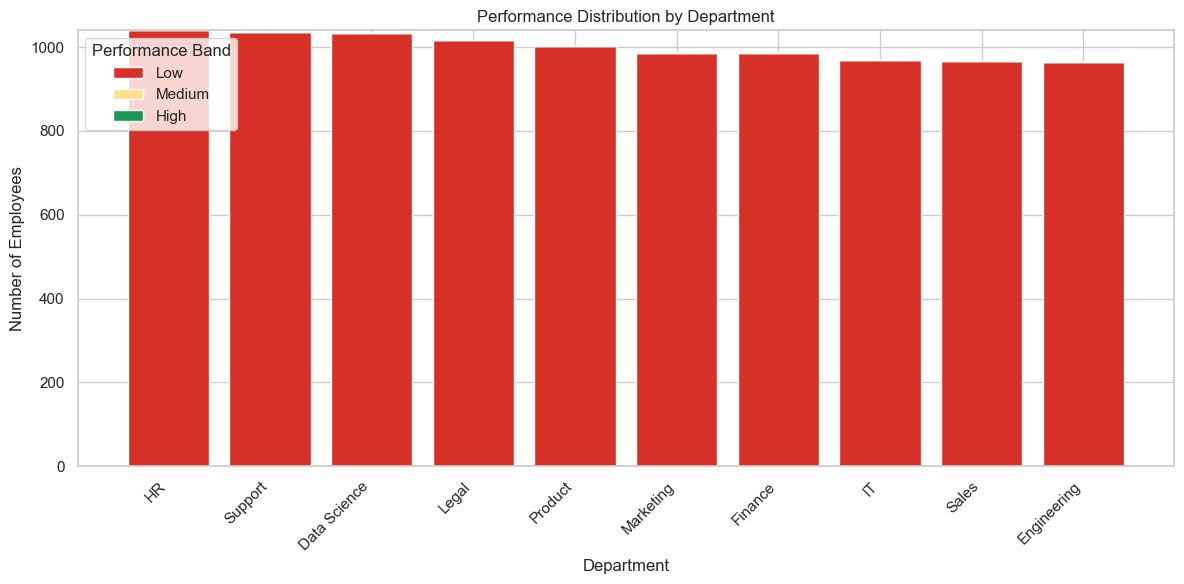

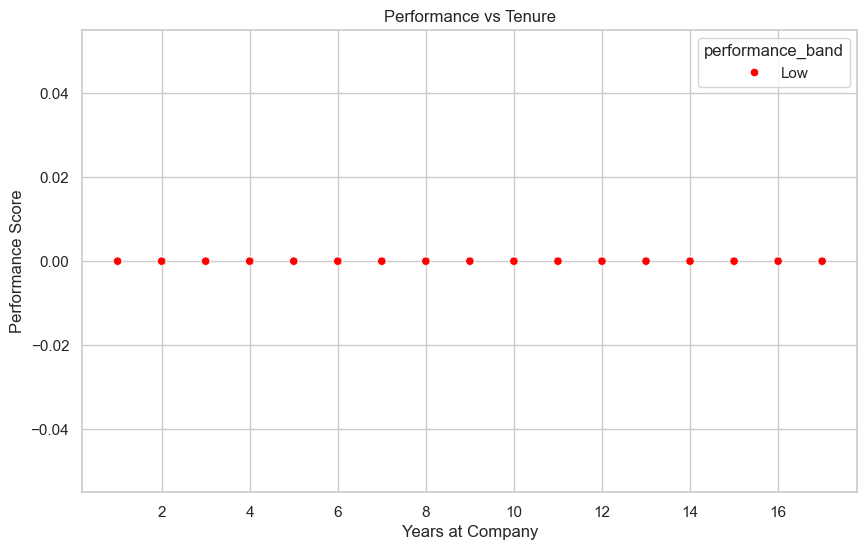

In [12]:
# Pivot performance bands safely
perf_summary = hrms_master.groupby('department')['performance_band'].value_counts().unstack(fill_value=0).reset_index()
for band in ['Low','Medium','High']:
    if band not in perf_summary.columns:
        perf_summary[band] = 0

# Plot stacked bar for performance
perf_summary['total'] = perf_summary[['Low','Medium','High']].sum(axis=1)
perf_summary = perf_summary.sort_values('total', ascending=False)

plt.figure(figsize=(12,6))
bottom_vals = None
colors = ['#d73027','#fee08b','#1a9850']  # Low=Red, Medium=Yellow, High=Green

for i, band in enumerate(['Low','Medium','High']):
    if bottom_vals is None:
        plt.bar(perf_summary['department'], perf_summary[band], color=colors[i], label=band)
        bottom_vals = perf_summary[band].copy()
    else:
        plt.bar(perf_summary['department'], perf_summary[band], bottom=bottom_vals, color=colors[i], label=band)
        bottom_vals += perf_summary[band]

plt.title("Performance Distribution by Department")
plt.ylabel("Number of Employees")
plt.xlabel("Department")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Performance Band')
plt.tight_layout()
plt.show()

# Performance vs Tenure
plt.figure(figsize=(10,6))
sns.scatterplot(data=hrms_master, x='years_at_company', y='performance_score', hue='performance_band', palette={'Low':'red','Medium':'yellow','High':'green'})
plt.title("Performance vs Tenure")
plt.xlabel("Years at Company")
plt.ylabel("Performance Score")
plt.show()


Top 10 candidates by skills:
      candidate_id  num_skills  experience_years
921     CAND00922           7                 5
1759    CAND01760           7                 3
1335    CAND01336           6                 0
1714    CAND01715           6                 0
2102    CAND02103           5                10
42      CAND00043           5                 0
52      CAND00053           5                 9
78      CAND00079           5                 4
924     CAND00925           5                20
1138    CAND01139           5                 0


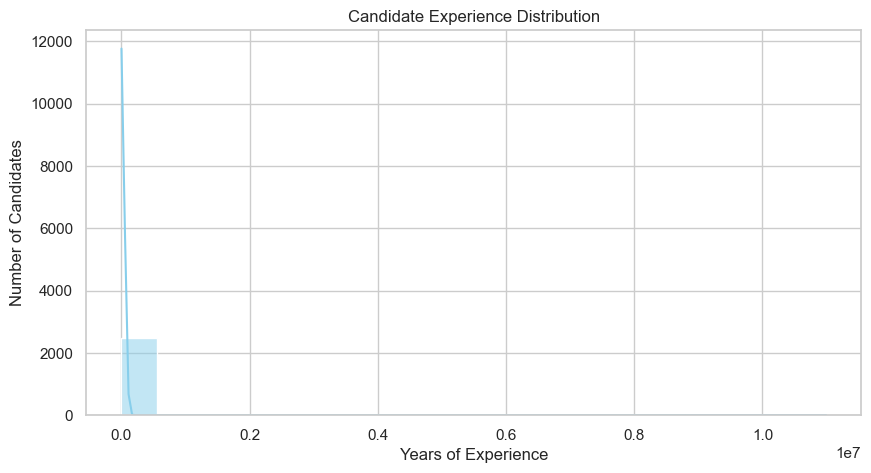

In [13]:
# Candidate skill counts & experience
candidate_master['skills_str'] = candidate_master['skills_str'].fillna('')
candidate_master['num_skills'] = candidate_master['skills'].apply(lambda x: len(eval(x)) if pd.notna(x) else 0)
candidate_master['experience_years'] = candidate_master['experience_years'].fillna(0)

# Top candidates by skills
top_candidates_skills = candidate_master.sort_values('num_skills', ascending=False)[
    ['candidate_id','num_skills','experience_years']
].head(10)
print("Top 10 candidates by skills:\n", top_candidates_skills)

# Experience distribution
plt.figure(figsize=(10,5))
sns.histplot(candidate_master['experience_years'], bins=20, kde=True, color='skyblue')
plt.title("Candidate Experience Distribution")
plt.xlabel("Years of Experience")
plt.ylabel("Number of Candidates")
plt.show()


C:\Users\abanu\AppData\Local\Temp\ipykernel_12588\2338273711.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_counts.values, y=skill_counts.index, palette='viridis')


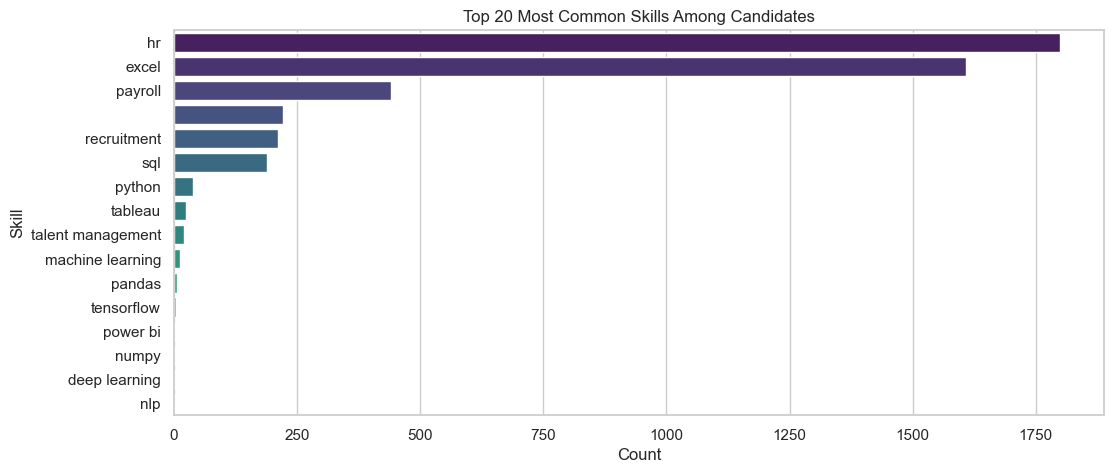

C:\Users\abanu\AppData\Local\Temp\ipykernel_12588\2338273711.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=jobs_master, x='seniority', order=jobs_master['seniority'].value_counts().index, palette='coolwarm')


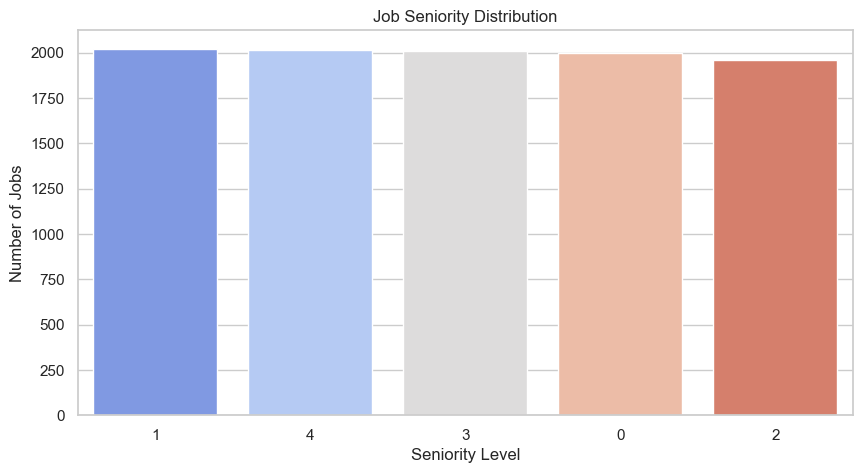

In [14]:
# Skills demand
all_skills = candidate_master['skills_str'].str.cat(sep=', ').split(', ')
skill_counts = pd.Series(all_skills).value_counts().head(20)
plt.figure(figsize=(12,5))
sns.barplot(x=skill_counts.values, y=skill_counts.index, palette='viridis')
plt.title("Top 20 Most Common Skills Among Candidates")
plt.xlabel("Count")
plt.ylabel("Skill")
plt.show()

# Job seniority distribution
plt.figure(figsize=(10,5))
sns.countplot(data=jobs_master, x='seniority', order=jobs_master['seniority'].value_counts().index, palette='coolwarm')
plt.title("Job Seniority Distribution")
plt.xlabel("Seniority Level")
plt.ylabel("Number of Jobs")
plt.show()


In [15]:
jobs_master['skills_str'] = jobs_master['skills'].fillna('')

# Vectorize skills
vectorizer = CountVectorizer()
candidate_vec = vectorizer.fit_transform(candidate_master['skills_str'])
job_vec = vectorizer.transform(jobs_master['skills_str'])

similarity_matrix = cosine_similarity(candidate_vec, job_vec)

top_matches = []
for i, candidate_id in enumerate(candidate_master['candidate_id']):
    top_job_indices = similarity_matrix[i].argsort()[::-1][:3]
    for idx in top_job_indices:
        top_matches.append({
            'candidate_id': candidate_id,
            'job_id': jobs_master.iloc[idx]['job_id'],
            'similarity_score': similarity_matrix[i, idx]
        })

matches_df = pd.DataFrame(top_matches)
matches_df.to_csv(OUT_PATH / "Candidate_Job_Matches.csv", index=False)
print(matches_df.head(10))


  candidate_id     job_id  similarity_score
0    CAND00001  JOB010000               0.0
1    CAND00001  JOB009999               0.0
2    CAND00001  JOB009998               0.0
3    CAND00002  JOB010000               0.0
4    CAND00002  JOB009999               0.0
5    CAND00002  JOB009998               0.0
6    CAND00003  JOB010000               0.0
7    CAND00003  JOB009999               0.0
8    CAND00003  JOB009998               0.0
9    CAND00004  JOB010000               0.0


In [16]:
# Departments needing attention: high attrition + low performance
dept_attention = hrms_master.groupby('department').agg(
    high_risk_attrition=('attrition_risk_level', lambda x: (x=='High').sum()),
    low_performance=('performance_band', lambda x: (x=='Low').sum())
).reset_index()

# Sort by combined risk
dept_attention['combined_risk'] = dept_attention['high_risk_attrition'] + dept_attention['low_performance']
dept_attention = dept_attention.sort_values('combined_risk', ascending=False)
dept_attention.to_csv(OUT_PATH / "Departments_Attention.csv", index=False)
print("Departments needing attention:\n", dept_attention)


Departments needing attention:
      department  high_risk_attrition  low_performance  combined_risk
9       Support                  194             1036           1230
1   Engineering                  244              965           1209
5         Legal                  192             1016           1208
3            HR                  161             1040           1201
7       Product                  172             1003           1175
6     Marketing                  178              986           1164
4            IT                  195              969           1164
0  Data Science                  128             1033           1161
2       Finance                  154              985           1139
8         Sales                  133              967           1100


In [ ]:
dept_summary.to_csv(OUT_PATH / "Dept_Attrition_Summary.csv", index=False)
perf_summary.to_csv(OUT_PATH / "Dept_Performance_Summary.csv", index=False)
candidate_master.to_csv(OUT_PATH / "Candidates_dashboard_master.csv", index=False)
jobs_master.to_csv(OUT_PATH / "Jobs_dashboard_master.csv", index=False)

print("✅ Notebook-10 completed: All insights and recommendation tables saved")



✅ Notebook-10 completed: All insights and recommendation tables saved
